In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sksurv
import sksurv.datasets
from sksurv.nonparametric import kaplan_meier_estimator

# Charger le dataset flchain
X, y = sksurv.datasets.load_flchain()

print("Shape du dataset X:", X.shape)
print("Colonnes disponibles:", X.columns.tolist())
print("Premières lignes de X:")
print(X.head())
print("\nInformations sur y (survie):")
print(y[:5])



Shape du dataset X: (7874, 9)
Colonnes disponibles: ['age', 'chapter', 'creatinine', 'flc.grp', 'kappa', 'lambda', 'mgus', 'sample.yr', 'sex']
Premières lignes de X:
    age      chapter  creatinine flc.grp  kappa  lambda mgus sample.yr sex
0  97.0  Circulatory         1.7      10   5.70   4.860   no      1997   F
1  92.0    Neoplasms         0.9       1   0.87   0.683   no      2000   F
2  94.0  Circulatory         1.4      10   4.36   3.850   no      1997   F
3  92.0  Circulatory         1.0       9   2.42   2.220   no      1996   F
4  93.0  Circulatory         1.1       6   1.32   1.690   no      1996   F

Informations sur y (survie):
[( True,   85.) ( True, 1281.) ( True,   69.) ( True,  115.)
 ( True, 1039.)]


In [2]:
# Ajuster l'estimateur de Kaplan-Meier
time, survival_prob = kaplan_meier_estimator(y['death'], y['futime'])

print(f"Nombre de points temporels: {len(time)}")
print(f"Probabilité de survie initiale: {survival_prob[0]:.4f}")
print(f"Probabilité de survie finale: {survival_prob[-1]:.4f}")
print(f"Temps minimum: {time[0]:.2f}")
print(f"Temps maximum: {time[-1]:.2f}")


Nombre de points temporels: 2977
Probabilité de survie initiale: 0.9996
Probabilité de survie finale: 0.6813
Temps minimum: 0.00
Temps maximum: 5215.00


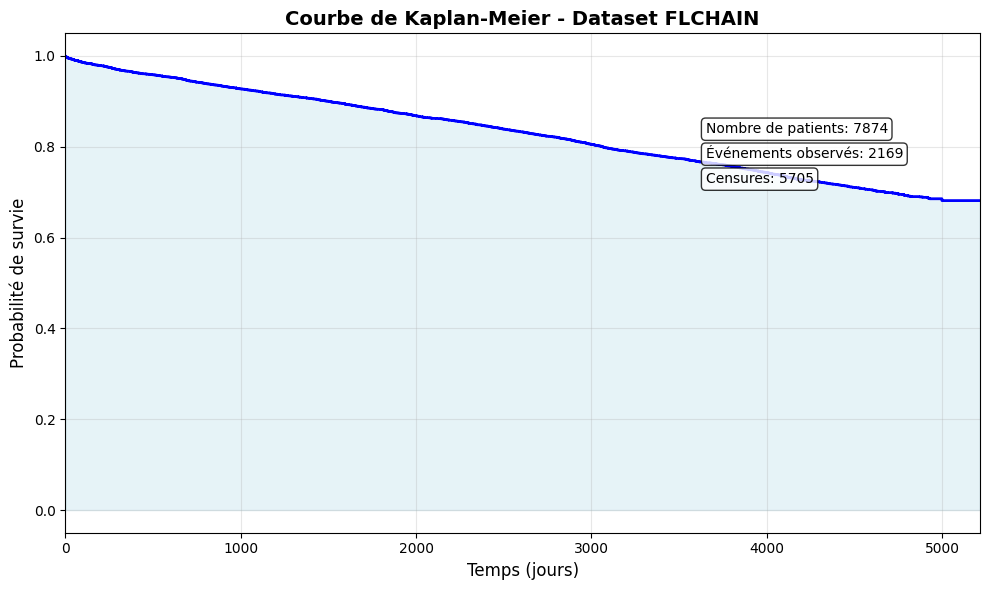

In [3]:
# Afficher la courbe de Kaplan-Meier
plt.figure(figsize=(10, 6))
plt.step(time, survival_prob, where="post", linewidth=2, color='blue')
plt.fill_between(time, survival_prob, step="post", alpha=0.3, color='lightblue')

plt.xlabel('Temps (jours)', fontsize=12)
plt.ylabel('Probabilité de survie', fontsize=12)
plt.title('Courbe de Kaplan-Meier - Dataset FLCHAIN', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(0, time[-1])

# Ajouter des informations statistiques
plt.text(0.7, 0.8, f'Nombre de patients: {len(y)}', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(0.7, 0.75, f'Événements observés: {np.sum(y["death"])}', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(0.7, 0.7, f'Censures: {len(y) - np.sum(y["death"])}', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()
